<a href="https://colab.research.google.com/github/dgromann/SemComp_WS2018/blob/master/Tutorial4/Tutorial4_model_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lesson 0.0.0: Store this notebook! 

Go to "File" and make sure you store this file as a local copy to either GitHub or your Google Drive. If you do not have a Google account and also do not want to create one, please check Option C below. 

Option A) Google Drive WITH collaboration

If you want to work in a collaborative manner where each of you in the group can see each other's contributions, one of you needs to store the notebook in Google Drive and share it with the others. You share it by clicking on the SHARE button on the top right of this page and share the link with the "everyone who receives this link can edit" option with the other team members per e-mail, skype, or any other way you prefer.

If you work with others, keep in mind to always copy the code before you edit it and always indicate your name as a comment (e.g. #Dagmar ) in the cell that it is clear who wrote which part. I also recommend creating a new code cell for your contributions.


Option B) Github without collaboration

Collaborative functions are not available when storing the notebook in GitHub; you will see your own work but not that of others.


Option C) Download this notebook as ipynb (Jupyter notebook) or py (Python file)

To run either of these on your local machine requires the installation of the required programs, which for the first tutorial are Python and NLTK. This will become more as we continue on to machine learning (requiring sklearn) and deep learning (requiring tensorflow and/or pytorch). In Google Codelab all of these are provided and do not need to be installed locally.

# Lesson 1: Support Vector Machines (SVM)

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

# import the different types of SVMs
from sklearn import svm

# import for parameter fine-tuning
from sklearn.model_selection import GridSearchCV

# use seaborn plotting defaults
import seaborn as sns; sns.set()

As an example, let's first look at one of the simplest classification tasks, namely, the binary classification with 
linearly separable data:

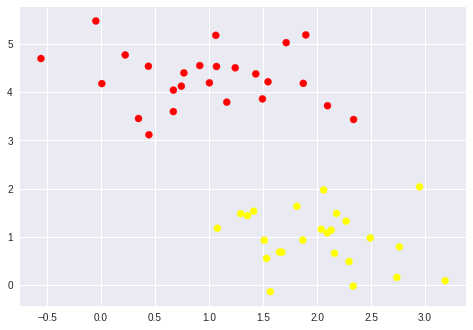

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

However, the dataset that we will use today is not that easy to classify if you look at the visualization below.

Feature:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
Shape:  (569, 30)


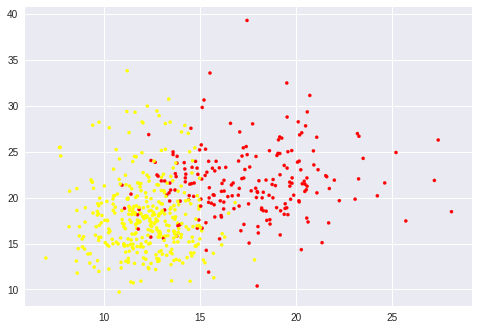

In [0]:
# Load dataset
cancer = datasets.load_breast_cancer()

# Let's look at the dataset 
print("Feature: ", cancer.feature_names)
print("Labels: ", cancer.target_names)

print("Shape: ", cancer.data.shape)

X = cancer.data
y = cancer.target

#Exercise: Visualize our dataset (you can use the visualization from above)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='autumn');

Work on the cancer dataset. First split the dataset and then train a linear classifier. 

In [0]:
# Exercise: Split the dataset into 70% training set and 
# 30% test set 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109)


In [0]:
# Exercise: initialize and train a SVM with a linear kernel and predict 
# the labels for the cancer dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [0]:
# Exercise: evaluate your model using the imported metrics library
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Exercise: also check Precision and Recall using the same libary
# How can those two be interpreted?
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629


In [0]:
# Exercise: train a SVM classifier with a polynomial or RBF kernel
# on the same dataset and compare the result
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)

In [0]:
# Exercise: evaluate your model using the imported metrics library
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

# Exercise: also check Precision and Recall using the same libary
# How can those two be interpreted?
print("Precision:",metrics.precision_score(y_test, y_pred_rbf))
print("Recall:",metrics.recall_score(y_test, y_pred_rbf))

# Exercise: compare the metrics of the linear and the rbf classifier
# Can you explain the difference?

Accuracy: 0.631578947368421
Precision: 0.631578947368421
Recall: 1.0


In [0]:
# Exercise: parameter fine-tuning
# Use GriDSearchCV to test the different parameter settings
# for linear and rbf kernels

classifier = svm.SVC()


param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

gs_clf_svm = GridSearchCV(classifier, param_grid)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)
print("Best score achieved with fine-tuning SVN:", gs_clf_svm.best_score_)
print("Best parameter settings for SGD: ", gs_clf_svm.best_params_)
print()

Best score achieved with fine-tuning SVN: 0.9597989949748744
Best parameter settings for SGD:  {'C': 1, 'kernel': 'linear'}



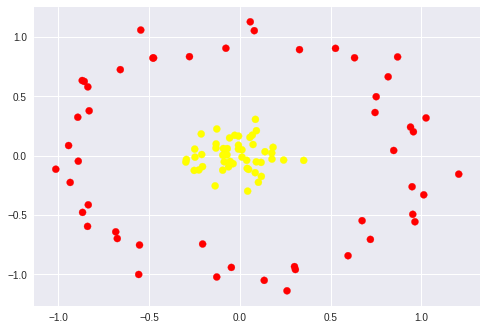

In [0]:
# Let's try this with a different dataset - run this cell to visualize it 
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [0]:
# Exercise: Do the grid search on this dataset using higher levels 
# of C to increase the penalty on prediction errors 
classifier = svm.SVC()


param_grid = [
  {'C': [1, 10, 100, 1000, 1000000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000, 1000000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

gs_clf_svm = GridSearchCV(classifier, param_grid)
gs_clf_svm = gs_clf_svm.fit(X, y)
print("Best score achieved with fine-tuning SVM:", gs_clf_svm.best_score_)
print("Best parameter settings for SGD: ", gs_clf_svm.best_params_)
print()

Best score achieved with fine-tuning SVM: 1.0
Best parameter settings for SGD:  {'C': 1000000, 'gamma': 0.001, 'kernel': 'rbf'}



The results of the classifier can also be shown as a confusion matrix. This becomes particulalry interesting for a multiclass 
classification problem, but can also be used for a binary classification as below..

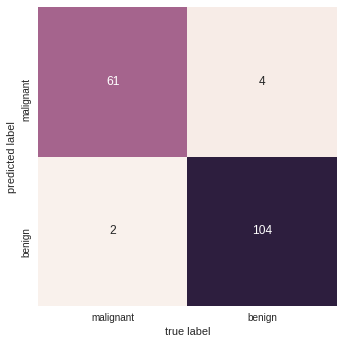

In [0]:
# Printing a confusion matrix of the results
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=cancer.target_names.tolist(), 
            yticklabels=cancer.target_names.tolist())
plt.xlabel('true label')
plt.ylabel('predicted label');

# Lesson 2: Text classification - classifier comparison

Since we are mostly interested in text, let's classify text and compare SVMs with decision trees and random forrests.

In [0]:
# Feel free to use the tweets from Tutorial 3 instead of this standard 
# dataset in this exercise 
from sklearn.datasets import fetch_20newsgroups

# import Decision Tree and Rrandom Forrest classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

categories =  ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)


In [0]:
# Exercise: provide the necessary imports to prepare a text 
# dataset - that is turn it into features
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [0]:
# Exercise: prepare the dataset by turning the text to features 
count_vec = CountVectorizer()
X_train_count = count_vec.fit_transform(twenty_train.data)
X_test_count = count_vec.transform(twenty_test.data)

tfidf_vec = TfidfTransformer()
X_train = tfidf_vec.fit_transform(X_train_count)
X_test = tfidf_vec.transform(X_test_count)

In [18]:
# Exercise: compare a linear and rbf kernel-based SVM 
# start with a small set of parameters 

clf_svm = svm.SVC()

param_grid = [
  {'C': [10, 100], 'kernel': ['linear']},
  {'C': [10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

gs_clf_svm = GridSearchCV(clf_svm, param_grid)
gs_clf_svm = gs_clf_svm.fit(X_train, twenty_train.target)
print("Best score achieved with fine-tuning SVM:", gs_clf_svm.best_score_)
print("Best parameter settings for SGD: ", gs_clf_svm.best_params_)
print()

svm_optim = svm.SVC(C=10, kernel='linear')
svm_optim = svm_optim.fit(X_train, twenty_train.target)
svm_predict = svm_optim.predict(X_test)

print("Decision Tree Accuracy:", metrics.accuracy_score(twenty_test.target, svm_predict))


Best score achieved with fine-tuning SVM: 0.9658839167035889
Best parameter settings for SGD:  {'C': 10, 'kernel': 'linear'}

Decision Tree Accuracy: 0.9221038615179761


In [16]:
# Exercise: compare the above classifier to a decision tree classifier 
# Adapt the parameters correspondingly 
# If you wish you could also try on the RandomForrest classifier
dt = DecisionTreeClassifier()

param_dt = {'min_samples_split': [2, 20, 40]}
gs_clf_dt = GridSearchCV(dt, param_dt)
gs_clf_dt = gs_clf_dt.fit(X_train, twenty_train.target)
print("Best score achieved with fine-tuning Decision Trees:", gs_clf_dt.best_score_)
print("Best parameter settings for Decision Trees: ", gs_clf_dt.best_params_)
print()

dt_optimized = DecisionTreeClassifier(min_samples_split=2)
dt_optimized = dt_optimized.fit(X_train, twenty_train.target)
dt_predict = dt_optimized.predict(X_test)


print("Decision Tree Accuracy:", metrics.accuracy_score(twenty_test.target, dt_predict))


Best score achieved with fine-tuning Decision Trees: 0.768276473194506
Best parameter settings for Decision Trees:  {'min_samples_split': 2}

Decision Tree Accuracy: 0.7170439414114514
